# ICESat-2 and Reference Elevation Comparison

This notebook compares ICESat-2 elevations to snow-off reference elevations calculted from DTM_reference_elevations_calculation_sliderulecsv.m or DTM_reference_elevations_calculation.m

Last updated by Karina Zikan July 2022

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Define Inputs

In [2]:
# File Paths
icesat2 = 'RCEW/RCEW-ICESat2-ATL08-params.csv'
ref_elevations = 'RCEW/RCEW-ICESat2-ATL08-ref-elevations.csv'
# Site
abbrev = 'RCEW'
site = 'RCEW/boundRCEW/boundRCEW_WGS84.geojson'
# ICESat-2 acronym
acronym = 'ATL08'

## Load data

In [3]:
icesat2 = gpd.read_file(icesat2)
ref_elev = gpd.read_file(ref_elevations)
region = gpd.read_file(site)

In [4]:
icesat2.geometry=gpd.points_from_xy(icesat2.Longitude, icesat2.Latitude)
ref_elev.geometry=gpd.points_from_xy(icesat2.Longitude, icesat2.Latitude)

### Calculate Snow on and Snow off Elevation Differences

In [33]:

nan_values=icesat2[icesat2['Elevation'].isna()] 
# icesat2.snow_off_diff = [icesat2.Elevation_bestfit-]
nan_values

Empty GeoDataFrame
Columns: [Latitude, Longitude, Elevation, Elevation_bestfit, Canopy, std, Easting, Northing, Brightness_Flag, Snow_Flag, ReferenceElevation, VerticalErrors, season, date, Elevation_Coregistered, differences, slope, aspect, geometry]
Index: []


### Check data arrays

In [26]:
icesat2.head()

,Latitude,Longitude,Elevation,Elevation_bestfit,Canopy,std,Easting,Northing,Brightness_Flag,Snow_Flag,ReferenceElevation,VerticalErrors,season,date,Elevation_Coregistered,differences,slope,aspect,geometry
0,43.20378,-116.697,NaN,1466.125,46.17834,3.402823e+38,524615.29975,4783490.00025,0,1,1486.65747070312,NaN,4,2018.90410958904,NaN,NaN,9.43075516971588,263.304720898056,POINT (-116.69700 43.20378)
1,43.20647,-116.6974,NaN,1434.723,48.5835,3.402823e+38,524585.39975,4783788.00025,0,1,1457.46899414062,NaN,4,2018.90410958904,NaN,NaN,16.9113724986722,299.636744559044,POINT (-116.69740 43.20647)
2,43.20737,-116.6975,NaN,1438.812,47.44385,3.402823e+38,524576.19975,4783888.00025,0,1,1465.75,NaN,4,2018.90410958904,NaN,NaN,13.8558454525779,292.978692465565,POINT (-116.69750 43.20737)
3,43.20827,-116.6976,1449.668,1450.877,45.97876,3.687252,524565.79975,4783988.00025,0,1,1479.84936523438,-30.1813652343751,4,2018.90410958904,1450.44450878906,-29.4048564453201,12.4688641733889,230.444434014291,POINT (-116.69760 43.20827)
4,43.20917,-116.6977,NaN,1475.977,45.58411,3.402823e+38,524555.39975,4784087.00025,0,1,1494.75952148438,NaN,4,2018.90410958904,NaN,NaN,11.5393603246282,247.543292841191,POINT (-116.69770 43.20917)


In [12]:
ref_elev.head()

,elevation_report_nw_mean,elevation_report_mean,elevation_report_fitted,elevation_report_std,geometry
0,1486.666,1486.661,1486.1328125,1.173375,POINT (-116.69700 43.20378)
1,1457.479,1457.483,1458.0703125,4.027685,POINT (-116.69740 43.20647)
2,1465.722,1465.722,1465.0625,1.733328,POINT (-116.69750 43.20737)
3,1479.886,1479.892,1479.515625,6.282501,POINT (-116.69760 43.20827)
4,1494.806,1494.835,1498.15625,2.974982,POINT (-116.69770 43.20917)


## Map of elevations

<AxesSubplot:title={'center':'Fitted Reference Elevations'}, xlabel='Longitude', ylabel='Latitude'>

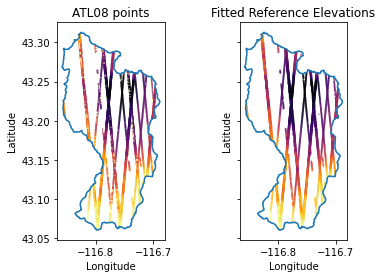

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("ATL08 points")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_aspect('equal')
icesat2.plot(ax=ax1, column='Elevation', cmap='inferno', s=0.1)
region.plot(ax=ax1)

ax2.set_title("Fitted Reference Elevations")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_aspect('equal')
ref_elev.plot(ax=ax2, column='elevation_report_fitted', cmap='inferno', s=0.1)
region.plot(ax=ax2)

## Map of Elevation differences

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Snow Off")
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_aspect('equal')
icesat2.plot(ax=ax1, column='Elevation', cmap='inferno', s=0.1)
region.plot(ax=ax1)

ax2.set_title("Snow Off")
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_aspect('equal')
ref_elev.plot(ax=ax2, column='elevation_report_fitted', cmap='inferno', s=0.1)
region.plot(ax=ax2)